In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize

In [2]:
indir_osc_weight_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/event_selections/osc_weights.csv"
osc_weight_MC = pd.read_csv(indir_osc_weight_MC).sort_values('old_event_no').reset_index(drop = True)
osc_weight_MC.rename(columns = {'old_event_no':'event_no'}, inplace = True)
print(len(osc_weight_MC))

68471353


In [3]:
indir_track_cascade_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/track_mu_Burnsample_RD_Full_db.csv"
indir_energy_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/energy_Burnsample_RD_Full_db.csv"
indir_zenith_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/zenith_Burnsample_RD_Full_db.csv"
indir_azimuth_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/azimuth_Burnsample_RD_Full_db.csv"
indir_multiclass_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/pid_Burnsample_RD_Full_db.csv"

indir_track_cascade_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/trained_models/osc_next_level3_v2/dynedge_track_mu_Track_cascade_MP_data_SplitInIcePulses_on_equal_track_cascade_neutrinos_test/results.csv"
indir_energy_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/trained_models/osc_next_level3_v2/Peter_Morten_energy_1_mill_even_track_cascade_attempt_2_test_set/results.csv"
indir_zenith_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/trained_models/osc_next_level3_v2/MP_data_zenith_1_mill_even_track_cascade_attempt2_test_set/results.csv"
indir_azimuth_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/trained_models/osc_next_level3_v2/MP_data_azimuth_test_1_mill_attempt2_test_set_equal_track_cascade/results.csv"
indir_multiclass_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/trained_models/osc_next_level3_v2/dynedge_pid_classification3_test/results.csv"



In [4]:
track_cascade_RD = pd.read_csv(indir_track_cascade_RD).sort_values('event_no').reset_index(drop = True)
energy_RD = pd.read_csv(indir_energy_RD).sort_values('event_no').reset_index(drop = True)
zenith_RD = pd.read_csv(indir_zenith_RD).sort_values('event_no').reset_index(drop = True)
azimuth_RD = pd.read_csv(indir_azimuth_RD).sort_values('event_no').reset_index(drop = True)
multiclass_RD = pd.read_csv(indir_multiclass_RD).sort_values('event_no').reset_index(drop = True)

track_cascade_MC = pd.read_csv(indir_track_cascade_MC).sort_values('event_no').reset_index(drop = True)
energy_MC = pd.read_csv(indir_energy_MC).sort_values('event_no').reset_index(drop = True)
zenith_MC = pd.read_csv(indir_zenith_MC).sort_values('event_no').reset_index(drop = True)
azimuth_MC = pd.read_csv(indir_azimuth_MC).sort_values('event_no').reset_index(drop = True)
multiclass_MC = pd.read_csv(indir_multiclass_MC).sort_values('event_no').reset_index(drop = True)

In [5]:
print(np.shape(energy_MC))

(4585522, 4)


In [6]:
track_cascade_MC = pd.merge(track_cascade_MC,osc_weight_MC,on='event_no',how='inner').reset_index(drop=True)
energy_MC = pd.merge(energy_MC,osc_weight_MC,on='event_no',how='inner').reset_index(drop=True)
zenith_MC = pd.merge(zenith_MC,osc_weight_MC,on='event_no',how='inner').reset_index(drop=True)
azimuth_MC = pd.merge(azimuth_MC,osc_weight_MC,on='event_no',how='inner').reset_index(drop=True)
multiclass_MC = pd.merge(multiclass_MC,osc_weight_MC,on='event_no',how='inner').reset_index(drop=True)

In [7]:
Burnsample_weight = 1/(365.2425*24*3600*10*0.01)
track_cascade_RD['osc_weight'] = np.ones(len(track_cascade_RD))*Burnsample_weight
energy_RD['osc_weight'] = np.ones(len(energy_RD))*Burnsample_weight 
zenith_RD['osc_weight'] = np.ones(len(zenith_RD))*Burnsample_weight 
azimuth_RD['osc_weight'] = np.ones(len(azimuth_RD))*Burnsample_weight 
multiclass_RD['osc_weight'] = np.ones(len(multiclass_RD))*Burnsample_weight 


In [8]:
print(osc_weight_MC['osc_weight'][osc_weight_MC['event_no']==320.0])
print(np.shape(track_cascade_MC))
print(track_cascade_MC.head(10))




320    6.029706e-07
Name: osc_weight, dtype: float64
(4585522, 5)
   Unnamed: 0  track_mu_pred  track_mu  event_no    osc_weight
0     4109962       0.511379       1.0     320.0  6.029706e-07
1     1810779       0.437622       1.0     344.0  3.311957e-07
2     3806952       0.412146       1.0     370.0  8.609741e-08
3     3266424       0.461440       1.0     378.0  8.196414e-08
4     1569369       0.516302       1.0     381.0  2.664120e-07
5      634826       0.552189       1.0     456.0  4.187771e-07
6     3590453       0.492596       1.0     582.0  7.628354e-07
7      917985       0.457702       1.0     613.0  5.899805e-08
8     2817052       0.450149       1.0     619.0  3.381217e-07
9     1738854       0.433827       1.0     643.0  1.902381e-07


[0.07899493 0.07801008 0.07730677 0.07331186 0.07228124 0.06869297
 0.07194114 0.06569759 0.07027829 0.06458369]
[0.05530668 0.05344341 0.05317723 0.05058935 0.05014571 0.04804583
 0.04859298 0.04522135 0.04736559 0.0461382 ]


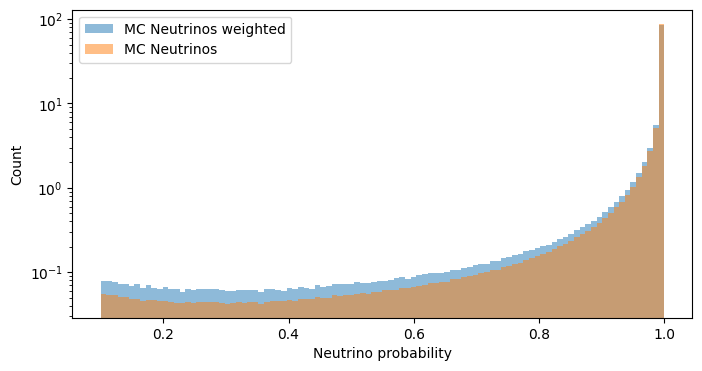

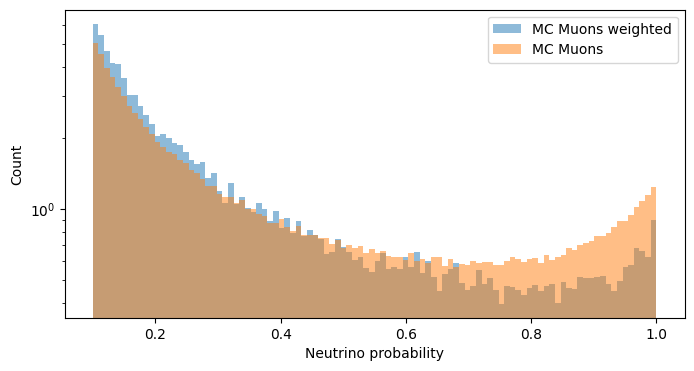

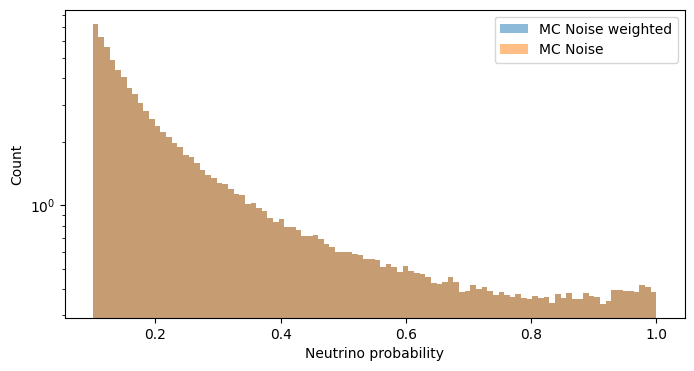

In [9]:


bins_to_use = np.linspace(0,1,101)
bins_to_fit = np.linspace(0.1,1,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=True,alpha=0.5,label='MC Neutrinos weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_test, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=True,alpha=0.5,label='MC Neutrinos')
axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()
print(counts_test_weights[:10])
print(counts_test[:10])

fig,axs =  plt.subplots(figsize=(8, 4))
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=True,alpha=0.5,label='MC Muons weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=True,alpha=0.5,label='MC Muons')
axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig,axs =  plt.subplots(figsize=(8, 4))
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=True,alpha=0.5,label='MC Noise weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=True,alpha=0.5,label='MC Noise')
axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

In [10]:
def to_logit(p):
    eps = 0.0000001
    try:
        if np.isnan(p):
            return
        p = p*(1-2*eps)+eps
        logit = np.log(p/(1-p))
    except ZeroDivisionError as e:
        print(e)
    return logit

safe_load_place_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/event_selections/Neutrino_prob_logit_MC.csv"
load_logit_MC = True
if load_logit_MC:
    input = pd.read_csv(safe_load_place_MC)
    multiclass_MC['pid_neutrino_pred_logit'] = input['pid_neutrino_pred_logit']
else:
    multiclass_MC['pid_neutrino_pred_logit'] = pd.Series(multiclass_MC['pid_neutrino_pred']).apply(to_logit)
    multiclass_MC['pid_neutrino_pred_logit'].to_csv(safe_load_place_MC)




safe_load_place_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/event_selections/Neutrino_prob_logit_RD.csv"
load_logit_RD = True
if load_logit_RD:
    input = pd.read_csv(safe_load_place_RD)
    multiclass_RD['pid_neutrino_pred_logit'] = input['pid_neutrino_pred']
else:
    multiclass_RD['pid_neutrino_pred_logit'] = pd.Series(multiclass_RD['pid_neutrino_pred']).apply(to_logit)


[0.0008241  0.00231625 0.04312811]
True


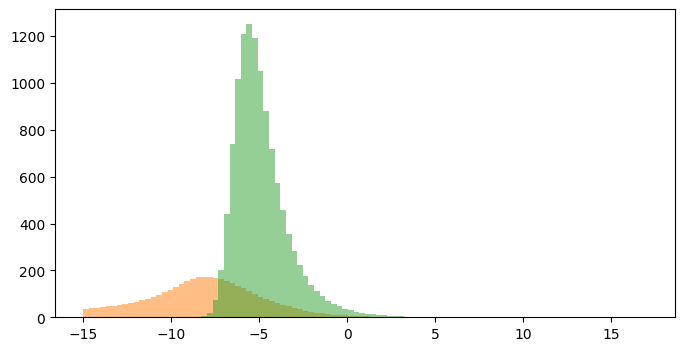

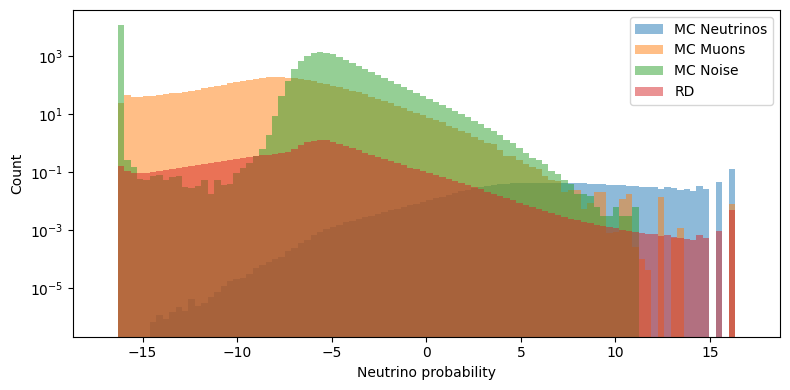

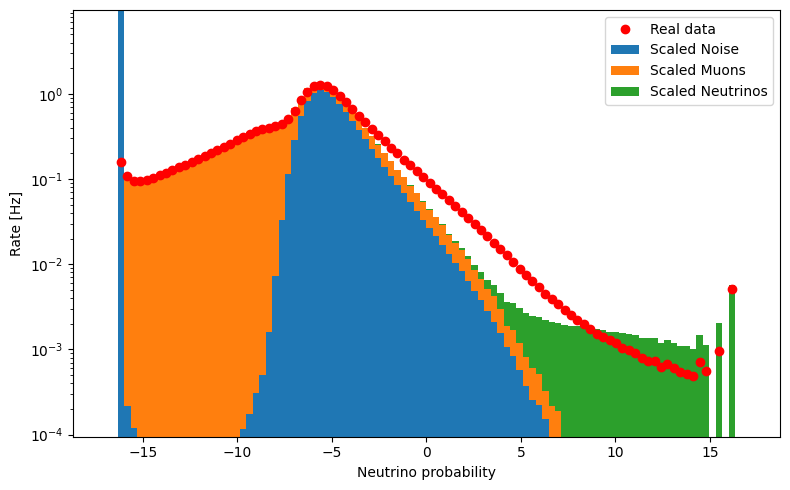

In [11]:
bins_to_use = np.linspace(-17,17,101)
bins_to_fit = np.linspace(-15,17,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_neutrino_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Noise',weights = multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD_fit, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'],bins=bins_to_fit,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])


fig, axs = plt.subplots(figsize=(8, 4))


bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

counts_neutrino, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_use,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_use,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_use,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'],bins=bins_to_use,density=False,alpha=0.5,label='RD',weights = multiclass_RD['osc_weight'])

axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig.tight_layout()


def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        if counts_RD_fit[i] != 0:
            sum+= (counts_RD_fit[i] - N_scalers[0]*counts_noise_fit[i] - N_scalers[1]*counts_muon_fit[i] - N_scalers[2]*counts_neutrino_fit[i])**2/counts_RD_fit[i]
    return sum

N_0 = [ 1.69090118, 17.63873833,  0.03073277]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None),(0, None), (0, None)))
print(res.x)
print(res.success)

counts_noise_plot = counts_noise*res.x[0]#
counts_muon_plot = counts_muon*res.x[1]##
counts_neutrino_plot = counts_neutrino*res.x[2]#*#



bin_width = bins_to_use[1]-bins_to_use[0]

fig, axs = plt.subplots(figsize=(8, 5))


axs.bar(bins_middle,counts_noise_plot,width=bin_width,label='Scaled Noise')
axs.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='Scaled Muons')
axs.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='Scaled Neutrinos')


axs.plot(bins_middle,counts_RD,'o',label='Real data',color='red')
axs.set_xlabel('Neutrino probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Rate [Hz]')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

[0.00029039 0.07185031 0.0005825 ]
True


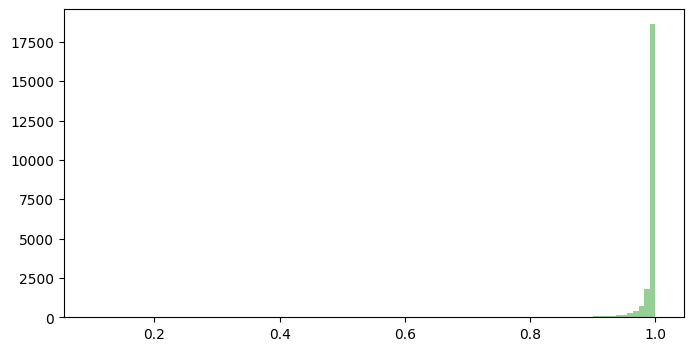

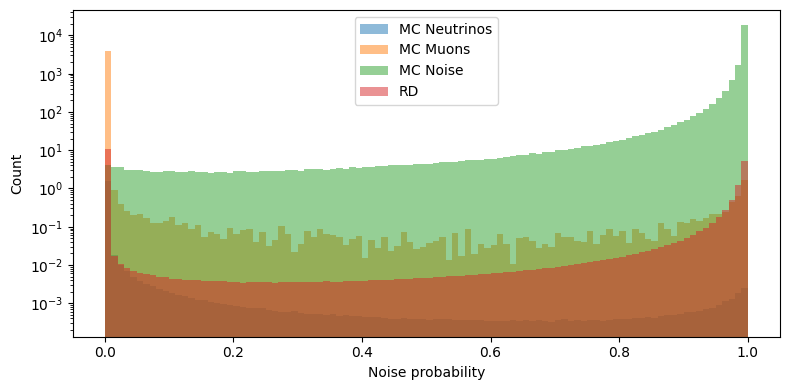

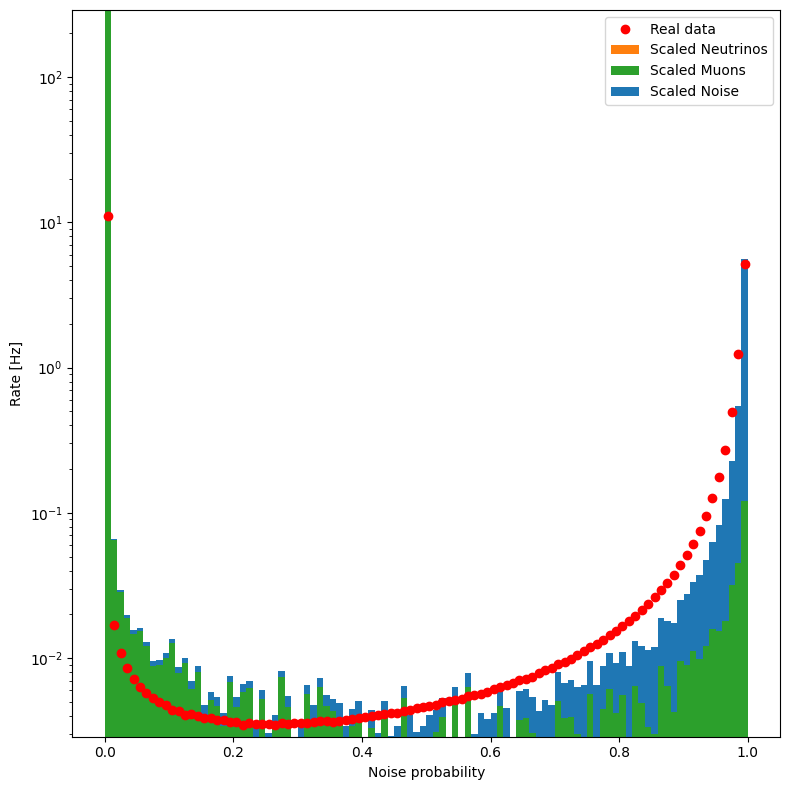

In [12]:
bins_to_use = np.linspace(0,1,101)
bins_to_fit = np.linspace(0.1,1,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_neutrino_fit, _,_ = axs.hist(multiclass_MC['pid_noise_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_noise_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_noise_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD_fit, _,_ = axs.hist(multiclass_RD['pid_noise_pred'],bins=bins_to_fit,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])


fig, axs = plt.subplots(figsize=(8, 4))


bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

counts_neutrino, _,_ = axs.hist(multiclass_MC['pid_noise_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_use,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon, _,_ = axs.hist(multiclass_MC['pid_noise_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_use,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise, _,_ = axs.hist(multiclass_MC['pid_noise_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_use,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD, _,_ = axs.hist(multiclass_RD['pid_noise_pred'],bins=bins_to_use,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])


axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Noise probability')
axs.legend()

fig.tight_layout()


def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        sum+= (counts_RD_fit[i] - N_scalers[0]*counts_noise_fit[i] - N_scalers[1]*counts_muon_fit[i] - N_scalers[2]*counts_neutrino_fit[i])**2/counts_RD_fit[i]
    return sum

N_0 = [50000,50000,50000]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None),(0, None), (0, None)))
print(res.x)
print(res.success)

counts_noise_plot = counts_noise*res.x[0]#
counts_muon_plot = counts_muon*res.x[1]##
counts_neutrino_plot = counts_neutrino*res.x[2]#*#


bin_width = bins_to_use[1]-bins_to_use[0]

fig, axs = plt.subplots(figsize=(8, 8))


axs.bar(bins_middle,counts_neutrino_plot,width=bin_width,label='Scaled Neutrinos',color='C1')
axs.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_neutrino_plot,label='Scaled Muons',color='C2')
axs.bar(bins_middle,counts_noise_plot,width=bin_width,bottom=counts_neutrino_plot+counts_muon_plot,label='Scaled Noise',color='C0')


axs.plot(bins_middle,counts_RD,'o',label='Real data',color='red')
axs.set_xlabel('Noise probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Rate [Hz]')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

In [13]:
def to_logit(p):
    eps = 0.0000001
    try:
        if np.isnan(p):
            return
        p = p*(1-2*eps)+eps
        logit = np.log(p/(1-p))
    except ZeroDivisionError as e:
        print(e)
    return logit

safe_load_place_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/event_selections/Noise_prob_logit_MC.csv"
load_logit_MC = False
if load_logit_MC:
    input = pd.read_csv(safe_load_place_MC)
    multiclass_MC['pid_noise_pred_logit'] = input['pid_noise_pred_logit']
else:
    multiclass_MC['pid_noise_pred_logit'] = pd.Series(multiclass_MC['pid_noise_pred']).apply(to_logit)
    multiclass_MC['pid_noise_pred_logit'].to_csv(safe_load_place_MC)




safe_load_place_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/event_selections/Noise_prob_logit_RD.csv"
load_logit_RD = False
if load_logit_RD:
    input = pd.read_csv(safe_load_place_RD)
    multiclass_RD['pid_noise_pred_logit'] = input['pid_noise_pred']
else:
    multiclass_RD['pid_noise_pred_logit'] = pd.Series(multiclass_RD['pid_noise_pred']).apply(to_logit)
    multiclass_MC['pid_noise_pred_logit'].to_csv(safe_load_place_MC)



ValueError: weights should have the same shape as x

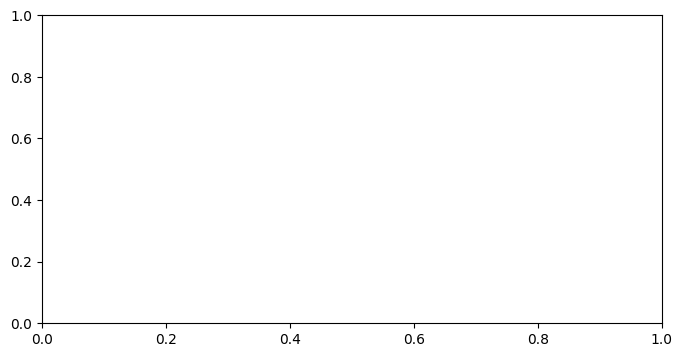

In [14]:
bins_to_use = np.linspace(-17,17,101)
bins_to_fit = np.linspace(-15,15,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_neutrino_fit, _,_ = axs.hist(multiclass_MC['pid_noise_pred_logit'][multiclass_MC['event_no'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_noise_pred_logit'][multiclass_MC['event_no'].isin((-13,13))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_noise_pred_logit'][multiclass_MC['event_no'].isin((-1,1))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Noise',weights = multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD_fit, _,_ = axs.hist(multiclass_RD['pid_noise_pred_logit'],bins=bins_to_fit,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])


fig, axs = plt.subplots(figsize=(8, 4))


bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

counts_neutrino, _,_ = axs.hist(multiclass_MC['pid_noise_pred_logit'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_use,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon, _,_ = axs.hist(multiclass_MC['pid_noise_pred_logit'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_use,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise, _,_ = axs.hist(multiclass_MC['pid_noise_pred_logit'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_use,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD, _,_ = axs.hist(multiclass_RD['pid_noise_pred_logit'],bins=bins_to_use,density=False,alpha=0.5,label='RD',weights = multiclass_RD['osc_weight'])

axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Noise probability [logit]')
axs.legend()

fig.tight_layout()


def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        if counts_RD_fit[i] != 0:
            sum+= (counts_RD_fit[i] - N_scalers[0]*counts_noise_fit[i] - N_scalers[1]*counts_muon_fit[i] - N_scalers[2]*counts_neutrino_fit[i])**2/counts_RD_fit[i]
    return sum

N_0 = [ 1.69090118, 17.63873833,  0.03073277]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None),(0, None), (0, None)))
print(res.x)
print(res.success)

counts_noise_plot = counts_noise*res.x[0]#
counts_muon_plot = counts_muon*res.x[1]##
counts_neutrino_plot = counts_neutrino*res.x[2]#*#



bin_width = bins_to_use[1]-bins_to_use[0]

fig, axs = plt.subplots(figsize=(8, 5))


axs.bar(bins_middle,counts_noise_plot,width=bin_width,label='Scaled Noise')
axs.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='Scaled Muons')
axs.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='Scaled Neutrinos')


axs.plot(bins_middle,counts_RD,'o',label='Real data',color='red')
axs.set_xlabel('Noise probability [logit]')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Rate [Hz]')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

In [ ]:
Noise_cut = -7.5
pure_particle_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_noise_pred_logit'] < Noise_cut]
pure_particle_selection_MC_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_noise_pred_logit'] < Noise_cut) & (multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))) ]
pure_particle_selection_MC_muons = multiclass_MC['event_no'][(multiclass_MC['pid_noise_pred_logit'] < Noise_cut) & (multiclass_MC['pid'].isin((-13,13))) ]

In [ ]:
print('this many pure particles RD',len(pure_particle_selection_RD))
print('this many pure particles neutrinos MC',len(pure_particle_selection_MC_neutrinos))
print('this many pure particles muons MC',len(pure_particle_selection_MC_muons))
#print(track_event_no)
#print(cascade_event_no)

this many pure particles RD 34757239
this many pure particles neutrinos MC 6741249
this many pure particles muons MC 7544133


[0.00254551 0.04108906]
True


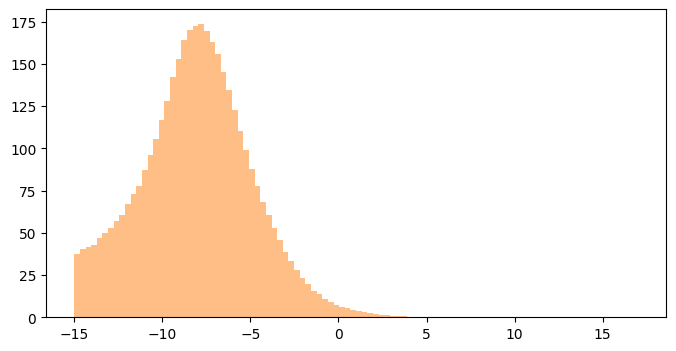

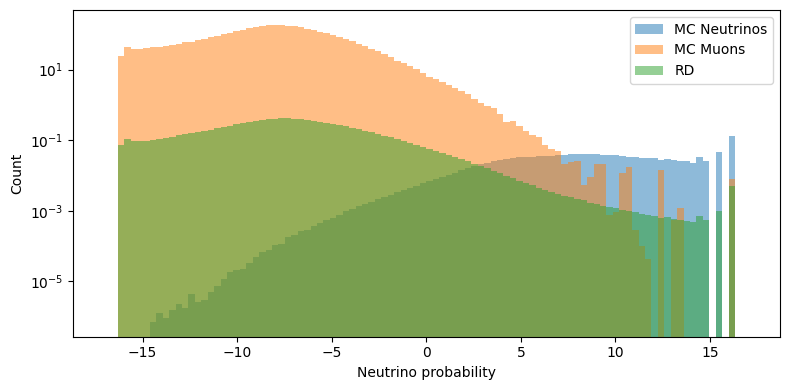

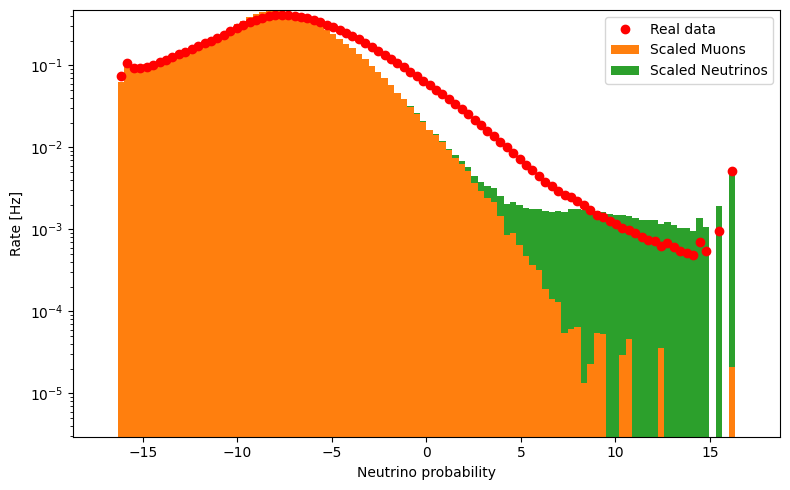

In [ ]:
bins_to_use = np.linspace(-17,17,101)
bins_to_fit = np.linspace(-15,17,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_neutrino_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin((pure_particle_selection_MC_neutrinos))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((pure_particle_selection_MC_neutrinos))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin((pure_particle_selection_MC_muons))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((pure_particle_selection_MC_muons))])
counts_RD_fit, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin((pure_particle_selection_RD))],bins=bins_to_fit,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin((pure_particle_selection_RD))])


fig, axs = plt.subplots(figsize=(8, 4))


bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

counts_neutrino, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin((pure_particle_selection_MC_neutrinos))],bins=bins_to_use,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((pure_particle_selection_MC_neutrinos))])
counts_muon, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin((pure_particle_selection_MC_muons))],bins=bins_to_use,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((pure_particle_selection_MC_muons))])
counts_RD, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin((pure_particle_selection_RD))],bins=bins_to_use,density=False,alpha=0.5,label='RD',weights = multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin((pure_particle_selection_RD))])

axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig.tight_layout()


def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        if counts_RD_fit[i] != 0:
            sum+= (counts_RD_fit[i] - N_scalers[0]*counts_muon_fit[i] - N_scalers[1]*counts_neutrino_fit[i])**2/counts_RD_fit[i]
    return sum

N_0 = [  17.63873833,  0.03073277]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None),(0, None)))
print(res.x)
print(res.success)


counts_muon_plot = counts_muon*res.x[0]##
counts_neutrino_plot = counts_neutrino*res.x[1]#*#



bin_width = bins_to_use[1]-bins_to_use[0]

fig, axs = plt.subplots(figsize=(8, 5))


axs.bar(bins_middle,counts_muon_plot,width=bin_width,label='Scaled Muons',color='C1')
axs.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_muon_plot,label='Scaled Neutrinos',color='C2')


axs.plot(bins_middle,counts_RD,'o',label='Real data',color='red')
axs.set_xlabel('Neutrino probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Rate [Hz]')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

In [ ]:
Neutrino_cut = 16
pure_neutrino_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_neutrino_pred_logit'] > Neutrino_cut]
pure_neutrino_selection_MC = multiclass_MC['event_no'][multiclass_MC['pid_neutrino_pred_logit'] > Neutrino_cut]

In [ ]:
print('this many pure neutrinos RD',len(pure_neutrino_selection_RD))
print('this many pure neutrinos MC',len(pure_neutrino_selection_MC))
track_event_no = track_cascade_MC['event_no'][track_cascade_MC['track_mu']==1]
cascade_event_no = track_cascade_MC['event_no'][track_cascade_MC['track_mu']==0]

pure_neutrino_track_selection = track_event_no[track_event_no.isin((pure_neutrino_selection_MC))].reset_index(drop=True)

pure_neutrino_cascade_selection = cascade_event_no[cascade_event_no.isin((pure_neutrino_selection_MC))].reset_index(drop=True)


this many pure neutrinos RD 19184
this many pure neutrinos MC 1014297


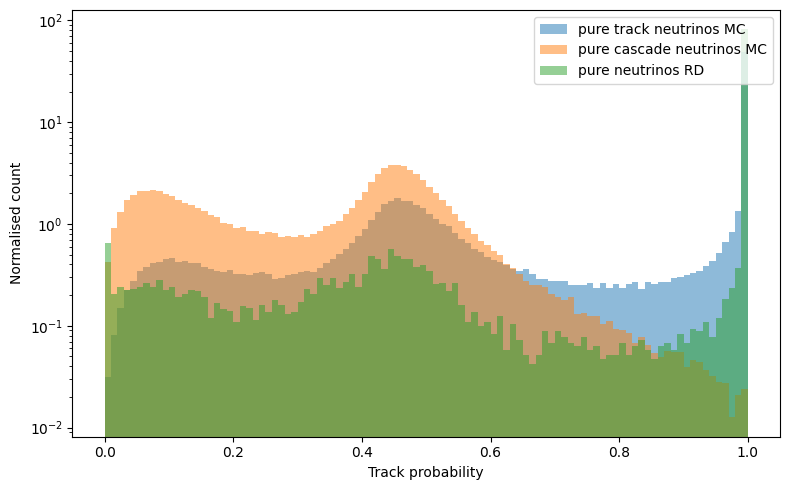

In [ ]:
fig, axs = plt.subplots(figsize=(8, 5))

bins_to_use = np.linspace(0,1,101)
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=True,bins=bins_to_use,label='pure track neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ],density=True,bins=bins_to_use,label='pure cascade neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ])
axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=True,bins=bins_to_use,label='pure neutrinos RD',alpha=0.5,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])

axs.set_xlabel('Track probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Normalised count')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

[0.00789954 0.01478562]
True


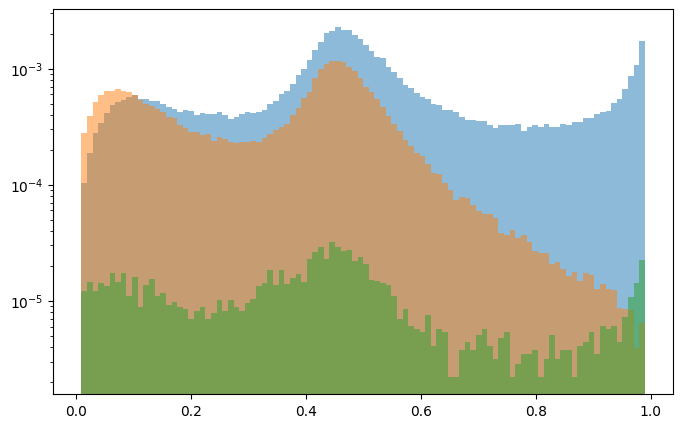

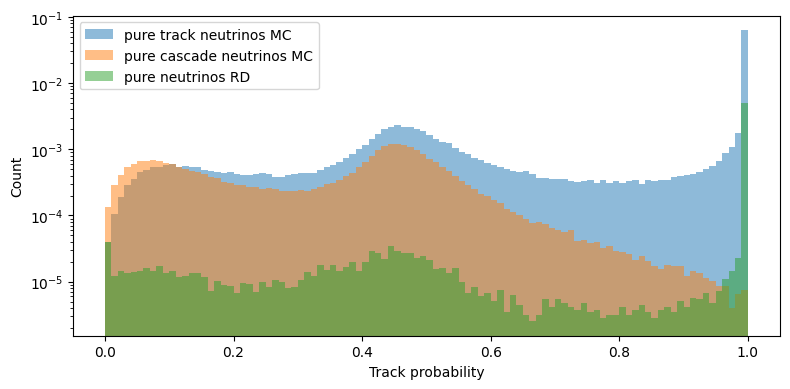

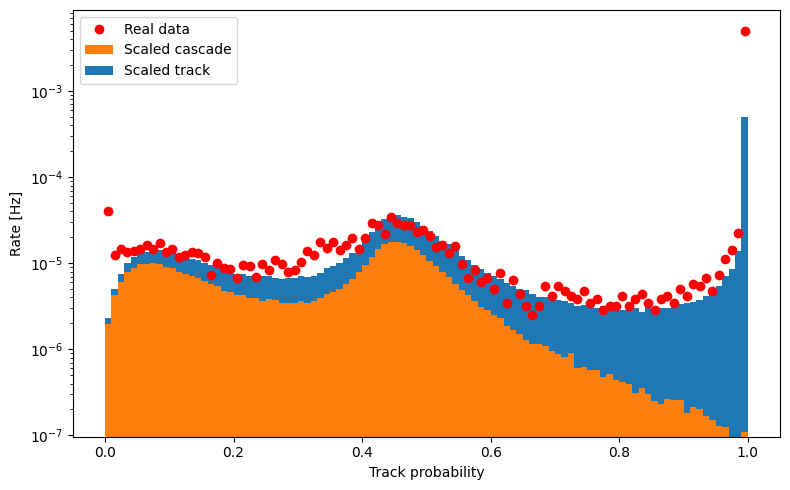

In [ ]:
bins_to_use = np.linspace(0,1,101)
bins_to_fit = np.linspace(0.01,0.99,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

fig, axs = plt.subplots(figsize=(8, 5))

counts_track_fit, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=False,bins=bins_to_fit,label='pure track neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
counts_cascade_fit, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)],density=False,bins=bins_to_fit,label='pure cascade neutrinos MC',alpha=0.5,weights = track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)])
counts_RD_fit, _,_ = axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=False,bins=bins_to_fit,label='pure neutrinos RD',alpha=0.5,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])

axs.set_yscale('log')

fig, axs = plt.subplots(figsize=(8, 4))


counts_track, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=False,bins=bins_to_use,label='pure track neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
counts_cascade, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)],density=False,bins=bins_to_use,label='pure cascade neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)])
counts_RD_multiclass, _,_ = axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=False,bins=bins_to_use,label='pure neutrinos RD',alpha=0.5,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])


axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Track probability')
axs.legend()

fig.tight_layout()


def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        sum+= (counts_RD_fit[i] - N_scalers[0]*counts_track_fit[i] - N_scalers[1]*counts_cascade_fit[i])**2/counts_RD_fit[i]
    return sum

N_0 = [50,50]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None), (0, None)))
print(res.x)
print(res.success)

counts_track_plot = counts_track*res.x[0]#
counts_cascade_plot = counts_cascade*res.x[1]##

bin_width = bins_to_use[1]-bins_to_use[0]

fig, axs = plt.subplots(figsize=(8, 5))


axs.bar(bins_middle,counts_cascade_plot,width=bin_width,label='Scaled cascade',color='C1')
axs.bar(bins_middle,counts_track_plot,width=bin_width,bottom=counts_cascade_plot,label='Scaled track',color='C0')


axs.plot(bins_middle,counts_RD_multiclass,'o',label='Real data',color='red')
axs.set_xlabel('Track probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Rate [Hz]')
axs.set_yscale('log')
axs.legend(loc='upper left')

fig.tight_layout()


In [ ]:
track_cut = 0.9
track_cut_2 = 0.99
pure_track_event_no_MC = track_cascade_MC['event_no'][(track_cascade_MC['track_mu_pred']>track_cut)]# & (track_cascade_MC['track_mu_pred'] < track_cut_2) ]
pure_track_event_no_RD = track_cascade_RD['event_no'][(track_cascade_RD['track_mu_pred']>track_cut)]# & (track_cascade_RD['track_mu_pred'] < track_cut_2)]

pure_cascade_event_no_MC = track_cascade_MC['event_no'][track_cascade_MC['track_mu_pred']<track_cut]
pure_cascade_event_no_RD = track_cascade_RD['event_no'][track_cascade_RD['track_mu_pred']<track_cut]


pure_track_selection_MC = pure_track_event_no_MC[pure_track_event_no_MC.isin(pure_neutrino_selection_MC)]
pure_track_selection_RD = pure_track_event_no_RD[pure_track_event_no_RD.isin(pure_neutrino_selection_RD)]


pure_cascade_selection_MC = pure_cascade_event_no_MC[pure_cascade_event_no_MC.isin(pure_neutrino_selection_MC)]
pure_cascade_selection_RD = pure_cascade_event_no_RD[pure_cascade_event_no_RD.isin(pure_neutrino_selection_RD)]

print(len(pure_track_selection_MC))
print(len(pure_track_selection_RD))
print(len(pure_cascade_selection_MC))
print(len(pure_cascade_selection_RD))

150696
15937
439451
3247


In [ ]:
# print(len(pure_track_selection_MC))
# print(len(pure_track_selection_RD))

# fig, axs = plt.subplots(figsize=(8, 8))

# axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_track_selection_MC)])
# axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_track_selection_RD)])

# axs.set_xlabel('Neutrino probability')
# #axs.set_ylim(bottom=1000)
# axs.set_ylabel('Count')
# axs.set_yscale('log')
# axs.legend(loc='upper left')

# fig.tight_layout()

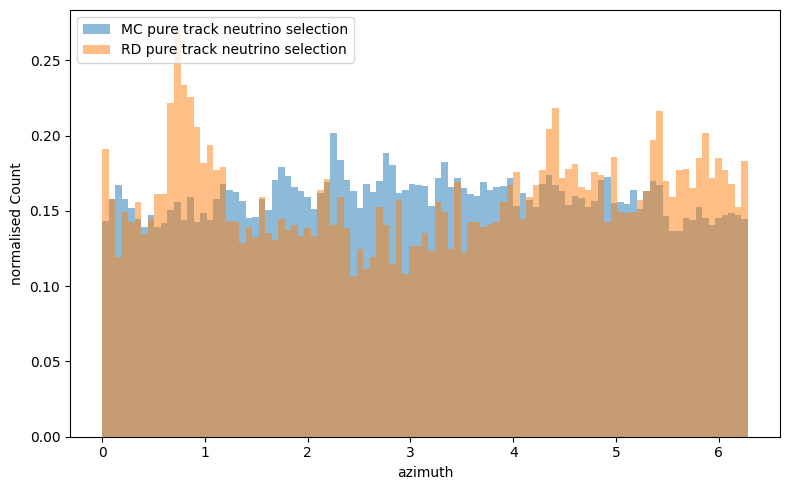

In [ ]:
bins=np.linspace(0,np.pi*2,100)
fig, axs = plt.subplots(figsize=(8, 5))

axs.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)],density=True,label='MC pure track neutrino selection',bins=bins,alpha=0.5,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
axs.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)],density=True,label='RD pure track neutrino selection',bins=bins,alpha=0.5,weights = azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(pure_track_selection_RD)])

axs.set_xlabel('azimuth')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('normalised Count')
#axs.set_yscale('log')
axs.legend(loc='upper left')

fig.tight_layout()

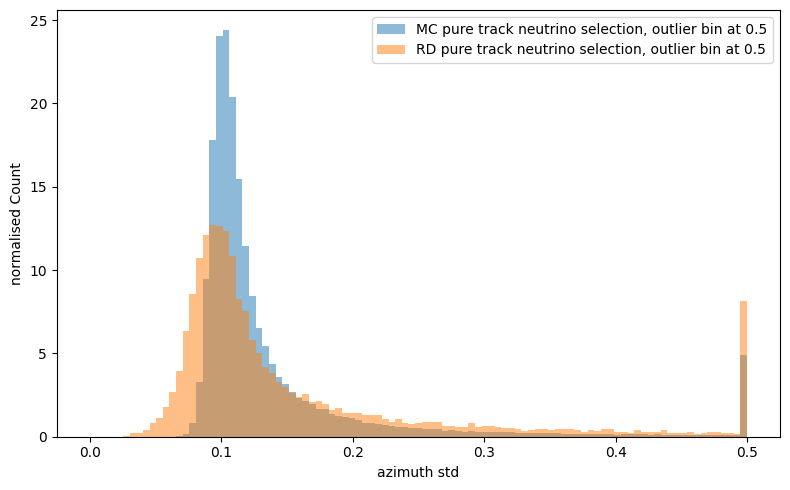

In [ ]:
bins=np.linspace(0,0.5,100)
fig, axs = plt.subplots(figsize=(8, 5))

axs.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]),0,0.5),density=True,label='MC pure track neutrino selection, outlier bin at 0.5',bins=bins,alpha=0.5,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
axs.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5),density=True,label='RD pure track neutrino selection, outlier bin at 0.5',bins=bins,alpha=0.5)

axs.set_xlabel('azimuth std')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('normalised Count')
#axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

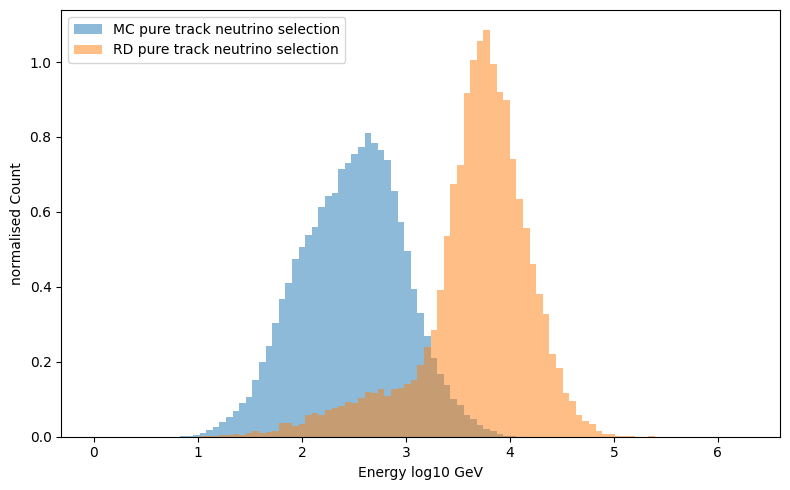

In [ ]:
bins=np.linspace(0,np.pi*2,100)
fig, axs = plt.subplots(figsize=(8, 5))

axs.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]),density=True,label='MC pure track neutrino selection',bins=bins,alpha=0.5,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
axs.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]),density=True,label='RD pure track neutrino selection',bins=bins,alpha=0.5)

axs.set_xlabel('Energy log10 GeV')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('normalised Count')
#axs.set_yscale('log')
axs.legend(loc='upper left')

fig.tight_layout()

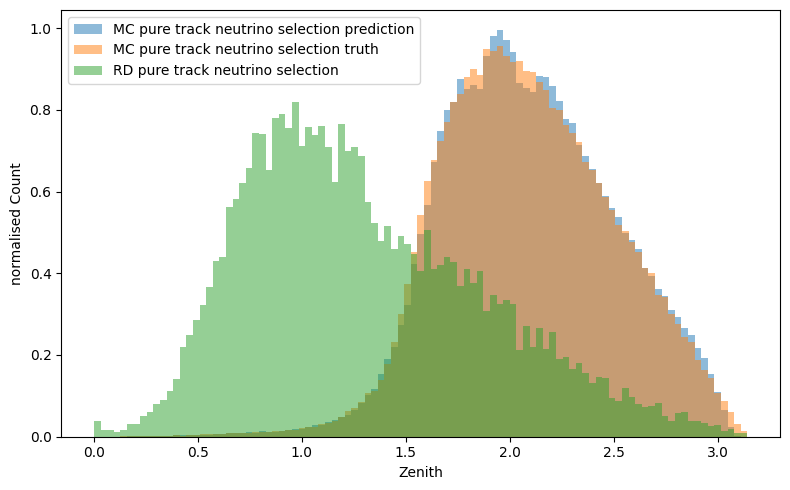

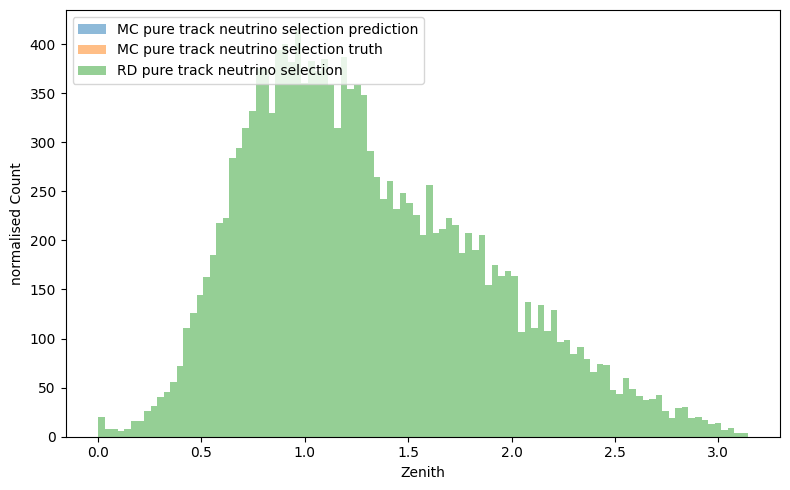

In [ ]:
bins=np.linspace(0,np.pi,100)
fig, axs = plt.subplots(figsize=(8, 5))

axs.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=True,label='MC pure track neutrino selection prediction',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
axs.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=True,label='MC pure track neutrino selection truth',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
axs.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],density=True,label='RD pure track neutrino selection',bins=bins,alpha=0.5)

axs.set_xlabel('Zenith')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('normalised Count')
#axs.set_yscale('log')
axs.legend(loc='upper left')

fig.tight_layout()


bins=np.linspace(0,np.pi,100)
fig, axs = plt.subplots(figsize=(8, 5))

axs.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=False,label='MC pure track neutrino selection prediction',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
axs.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=False,label='MC pure track neutrino selection truth',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
axs.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],density=False,label='RD pure track neutrino selection',bins=bins,alpha=0.5)

axs.set_xlabel('Zenith')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('normalised Count')
#axs.set_yscale('log')
axs.legend(loc='upper left')

fig.tight_layout()

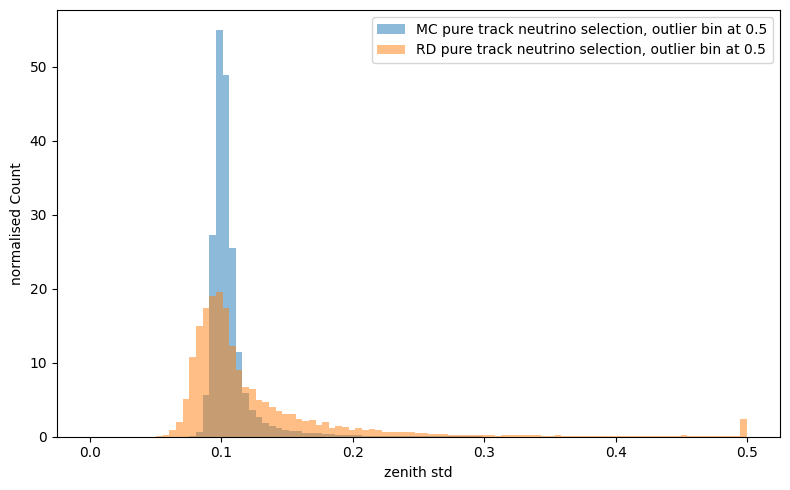

In [ ]:
bins=np.linspace(0,0.5,100)
fig, axs = plt.subplots(figsize=(8, 5))

axs.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]),0,0.5),density=True,label='MC pure track neutrino selection, outlier bin at 0.5',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
axs.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5),density=True,label='RD pure track neutrino selection, outlier bin at 0.5',bins=bins,alpha=0.5)

axs.set_xlabel('zenith std')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('normalised Count')
#axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

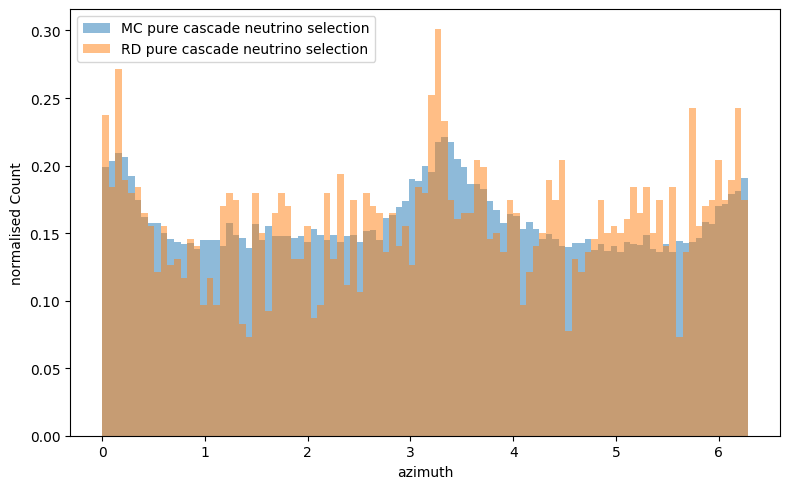

In [ ]:
bins=np.linspace(0,np.pi*2,100)
fig, axs = plt.subplots(figsize=(8, 5))

axs.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)],density=True,label='MC pure cascade neutrino selection',bins=bins,alpha=0.5,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
axs.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)],density=True,label='RD pure cascade neutrino selection',bins=bins,alpha=0.5)

axs.set_xlabel('azimuth')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('normalised Count')
#axs.set_yscale('log')
axs.legend(loc='upper left')

fig.tight_layout()

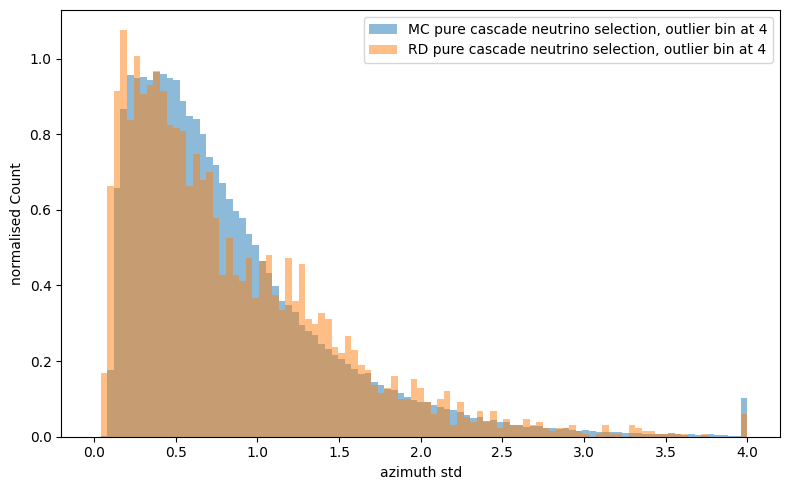

In [ ]:
bins=np.linspace(0,4,100)
fig, axs = plt.subplots(figsize=(8, 5))

axs.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]),0,4),density=True,label='MC pure cascade neutrino selection, outlier bin at 4',bins=bins,alpha=0.5,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
axs.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]),0,4),density=True,label='RD pure cascade neutrino selection, outlier bin at 4',bins=bins,alpha=0.5)

axs.set_xlabel('azimuth std')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('normalised Count')
#axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

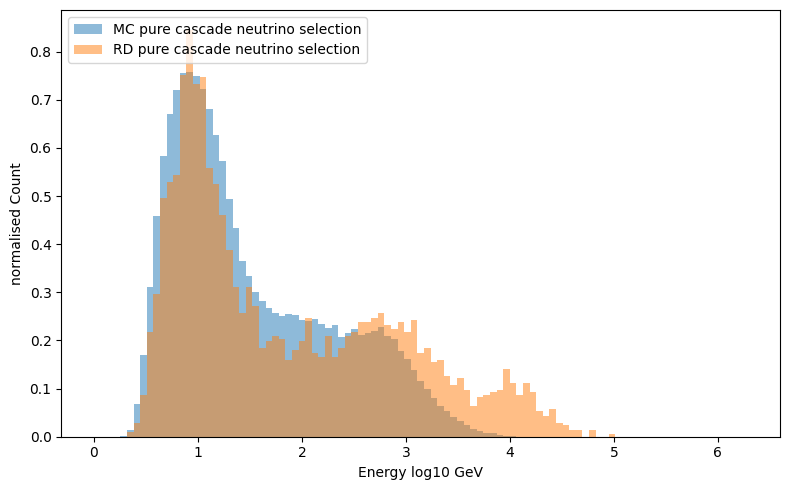

In [ ]:
bins=np.linspace(0,np.pi*2,100)
fig, axs = plt.subplots(figsize=(8, 5))

axs.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]),density=True,label='MC pure cascade neutrino selection',bins=bins,alpha=0.5,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
axs.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]),density=True,label='RD pure cascade neutrino selection',bins=bins,alpha=0.5)

axs.set_xlabel('Energy log10 GeV')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('normalised Count')
#axs.set_yscale('log')
axs.legend(loc='upper left')

fig.tight_layout()

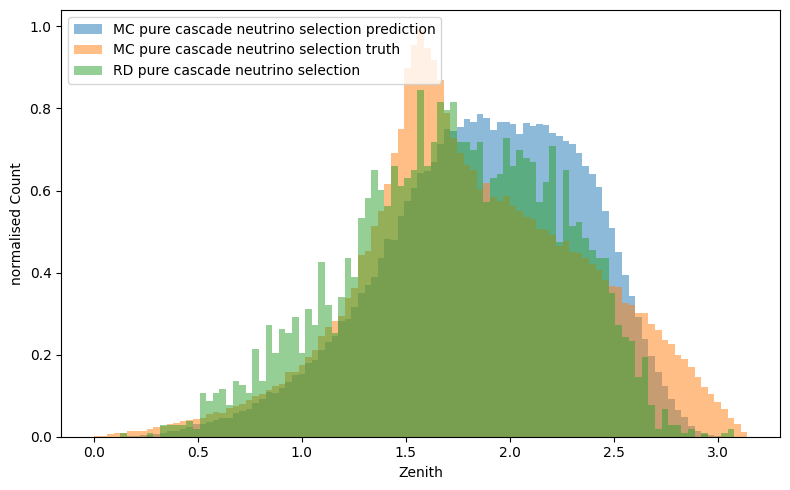

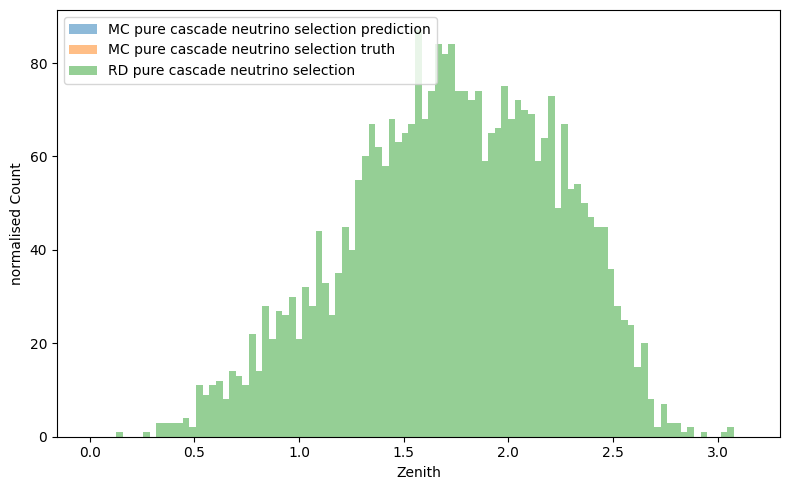

In [ ]:
bins=np.linspace(0,np.pi,100)
fig, axs = plt.subplots(figsize=(8, 5))

axs.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=True,label='MC pure cascade neutrino selection prediction',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
axs.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=True,label='MC pure cascade neutrino selection truth',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
axs.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],density=True,label='RD pure cascade neutrino selection',bins=bins,alpha=0.5)

axs.set_xlabel('Zenith')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('normalised Count')
#axs.set_yscale('log')
axs.legend(loc='upper left')

fig.tight_layout()


bins=np.linspace(0,np.pi,100)
fig, axs = plt.subplots(figsize=(8, 5))

axs.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=False,label='MC pure cascade neutrino selection prediction',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
axs.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=False,label='MC pure cascade neutrino selection truth',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
axs.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],density=False,label='RD pure cascade neutrino selection',bins=bins,alpha=0.5)

axs.set_xlabel('Zenith')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('normalised Count')
#axs.set_yscale('log')
axs.legend(loc='upper left')

fig.tight_layout()

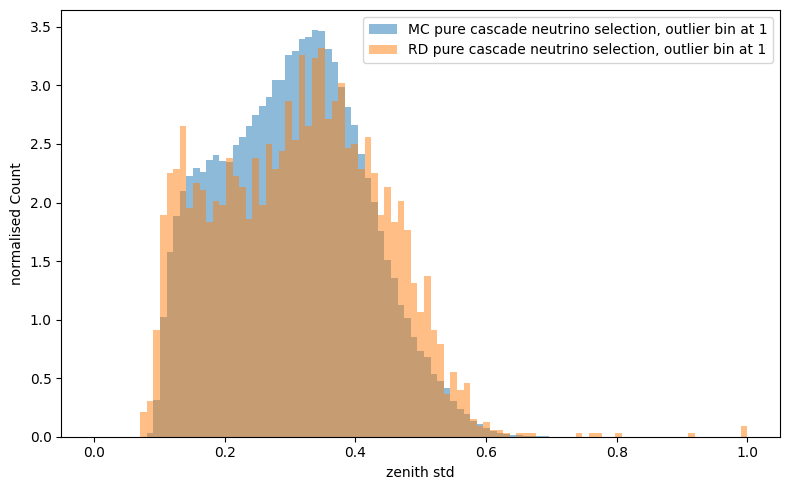

In [ ]:
bins=np.linspace(0,1,100)
fig, axs = plt.subplots(figsize=(8, 5))

axs.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]),0,1),density=True,label='MC pure cascade neutrino selection, outlier bin at 1',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
axs.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]),0,1),density=True,label='RD pure cascade neutrino selection, outlier bin at 1',bins=bins,alpha=0.5)

axs.set_xlabel('zenith std')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('normalised Count')
#axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

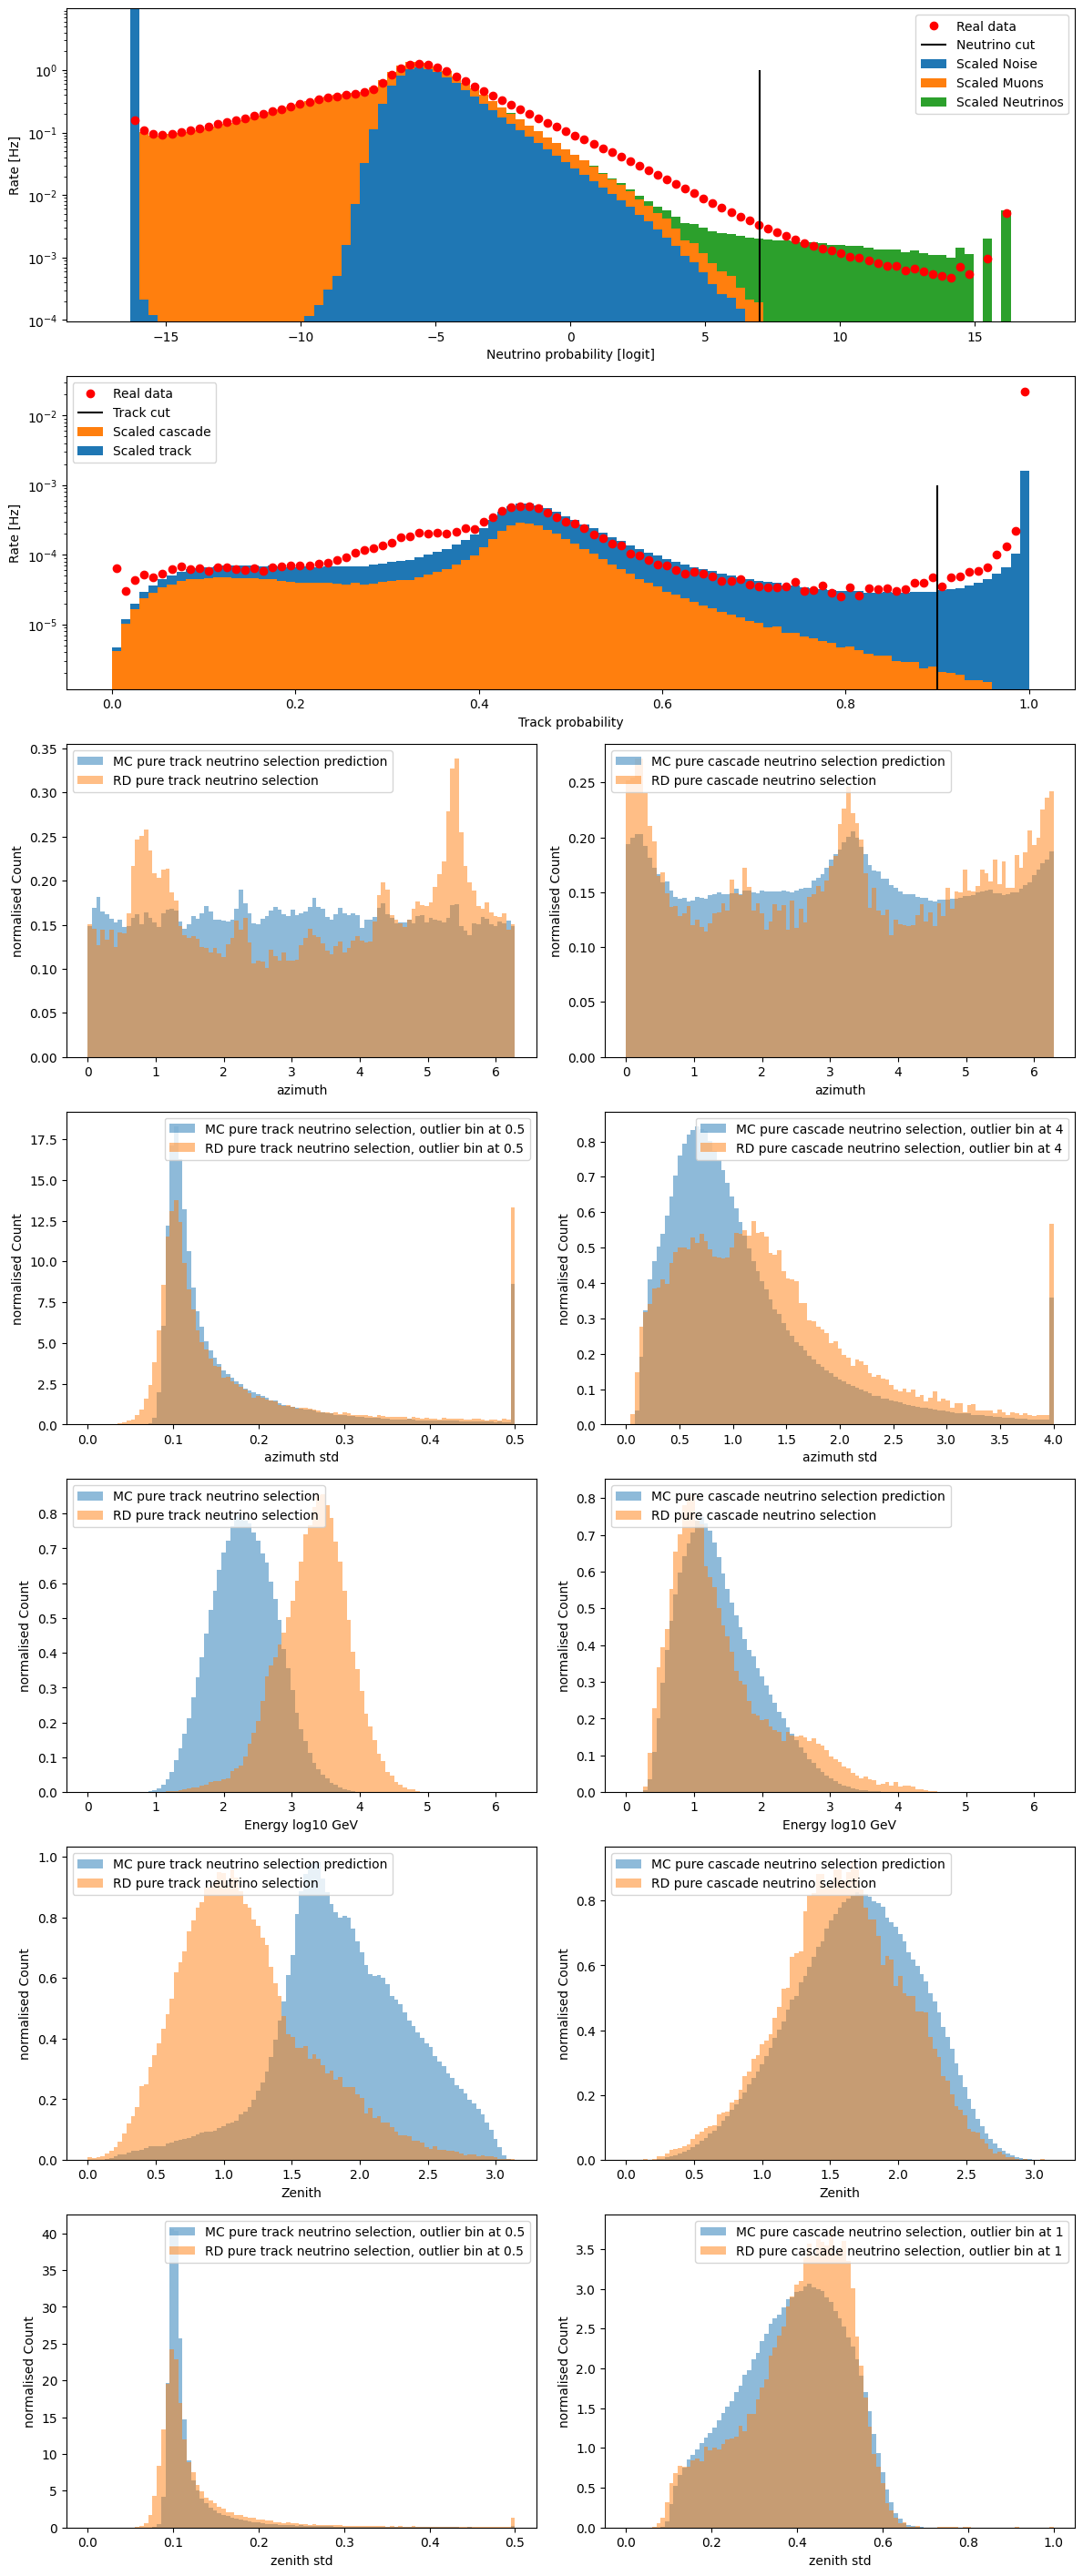

In [ ]:
with_MC_truth = False


bins_to_use = np.linspace(-17,17,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]

fig = plt.figure(figsize=(12,32))
ax1 = plt.subplot2grid(shape=(8,2), loc=(0,0), colspan=2, fig=fig)
ax1.bar(bins_middle,counts_noise_plot,width=bin_width,label='Scaled Noise')
ax1.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='Scaled Muons')
ax1.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='Scaled Neutrinos')
ax1.plot(bins_middle,counts_RD,'o',label='Real data',color='red')
ax1.vlines(Neutrino_cut,0,1,color='black',label='Neutrino cut')
ax1.set_xlabel('Neutrino probability [logit]')
#ax1.set_ylim(bottom=1000)
ax1.set_ylabel('Rate [Hz]')
ax1.set_yscale('log')
ax1.legend(loc='upper right')


bins_to_use = np.linspace(0,1,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]
ax2 = plt.subplot2grid((8,2), (1,0), colspan=2)
ax2.bar(bins_middle,counts_cascade_plot,width=bin_width,label='Scaled cascade',color='C1')
ax2.bar(bins_middle,counts_track_plot,width=bin_width,bottom=counts_cascade_plot,label='Scaled track',color='C0')
ax2.plot(bins_middle,counts_RD_multiclass,'o',label='Real data',color='red')
ax2.vlines(track_cut,0,10**-3,color='black',label='Track cut')
ax2.set_xlabel('Track probability')
ax2.set_ylabel('Rate [Hz]')
ax2.set_yscale('log')
ax2.legend(loc='upper left')

bins=np.linspace(0,np.pi*2,100)
ax3 = plt.subplot2grid((8,2), (2,0), colspan=1)
ax3.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)],density=True,label='MC pure track neutrino selection prediction',bins=bins,alpha=0.5,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
ax3.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)],density=True,label='RD pure track neutrino selection',bins=bins,alpha=0.5)
if with_MC_truth:
    ax3.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_track_selection_MC)],density=True,label='MC pure track neutrino selection truch',bins=bins,alpha=0.5,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
ax3.set_xlabel('azimuth')
ax3.set_ylabel('normalised Count')
ax3.legend(loc='upper left')

ax4 = plt.subplot2grid((8,2), (2,1), colspan=1)
bins=np.linspace(0,np.pi*2,100)
ax4.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)],density=True,label='MC pure cascade neutrino selection prediction',bins=bins,alpha=0.5,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
ax4.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)],density=True,label='RD pure cascade neutrino selection',bins=bins,alpha=0.5)
if with_MC_truth:
    ax4.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)],density=True,label='MC pure cascade neutrino selection truth',bins=bins,alpha=0.5,weights=azimuth_MC['osc_weights'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
ax4.set_xlabel('azimuth')
ax4.set_ylabel('normalised Count')
ax4.legend(loc='upper left')

ax5 = plt.subplot2grid((8,2), (3,0), colspan=1)
bins=np.linspace(0,0.5,100)
ax5.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]),0,0.5),density=True,label='MC pure track neutrino selection, outlier bin at 0.5',bins=bins,alpha=0.5,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
ax5.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5),density=True,label='RD pure track neutrino selection, outlier bin at 0.5',bins=bins,alpha=0.5)
ax5.set_xlabel('azimuth std')
ax5.set_ylabel('normalised Count')
ax5.legend(loc='upper right')


ax6 = plt.subplot2grid((8,2), (3,1), colspan=1)
bins=np.linspace(0,4,100)
ax6.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]),0,4),density=True,label='MC pure cascade neutrino selection, outlier bin at 4',bins=bins,alpha=0.5,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
ax6.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]),0,4),density=True,label='RD pure cascade neutrino selection, outlier bin at 4',bins=bins,alpha=0.5)
ax6.set_xlabel('azimuth std')
ax6.set_ylabel('normalised Count')
ax6.legend(loc='upper right')

ax7 = plt.subplot2grid((8,2), (4,0), colspan=1)
bins=np.linspace(0,np.pi*2,100)
ax7.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]),density=True,label='MC pure track neutrino selection',bins=bins,alpha=0.5,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
ax7.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]),density=True,label='RD pure track neutrino selection',bins=bins,alpha=0.5)
if with_MC_truth:
    ax7.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_track_selection_MC)]),density=True,label='MC pure track neutrino selection',bins=bins,alpha=0.5,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])

ax7.set_xlabel('Energy log10 GeV')
ax7.set_ylabel('normalised Count')
ax7.legend(loc='upper left')


ax8 = plt.subplot2grid((8,2), (4,1), colspan=1)
bins=np.linspace(0,np.pi*2,100)
ax8.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]),density=True,label='MC pure cascade neutrino selection prediction',bins=bins,alpha=0.5,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
ax8.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]),density=True,label='RD pure cascade neutrino selection',bins=bins,alpha=0.5)
if with_MC_truth:
    ax8.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]),density=True,label='MC pure cascade neutrino selection truth',bins=bins,alpha=0.5,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
ax8.set_xlabel('Energy log10 GeV')
ax8.set_ylabel('normalised Count')
ax8.legend(loc='upper left')



ax9 = plt.subplot2grid((8,2), (5,0), colspan=1)
bins=np.linspace(0,np.pi,100)
ax9.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=True,label='MC pure track neutrino selection prediction',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
ax9.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],density=True,label='RD pure track neutrino selection',bins=bins,alpha=0.5)
if with_MC_truth:
    ax9.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=True,label='MC pure track neutrino selection truth',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
ax9.set_xlabel('Zenith')
ax9.set_ylabel('normalised Count')
ax9.legend(loc='upper left')



ax10 = plt.subplot2grid((8,2), (5,1), colspan=1)
bins=np.linspace(0,np.pi,100)
ax10.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=True,label='MC pure cascade neutrino selection prediction',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
ax10.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],density=True,label='RD pure cascade neutrino selection',bins=bins,alpha=0.5)
if with_MC_truth:
    ax10.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=True,label='MC pure cascade neutrino selection truth',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
ax10.set_xlabel('Zenith')
ax10.set_ylabel('normalised Count')
ax10.legend(loc='upper left')


ax11 = plt.subplot2grid((8,2), (6,0), colspan=1)
bins=np.linspace(0,0.5,100)
ax11.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]),0,0.5),density=True,label='MC pure track neutrino selection, outlier bin at 0.5',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
ax11.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5),density=True,label='RD pure track neutrino selection, outlier bin at 0.5',bins=bins,alpha=0.5)
ax11.set_xlabel('zenith std')
ax11.set_ylabel('normalised Count')
ax11.legend(loc='upper right')


ax12 = plt.subplot2grid((8,2), (6,1), colspan=1)
bins=np.linspace(0,1,100)
ax12.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]),0,1),density=True,label='MC pure cascade neutrino selection, outlier bin at 1',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
ax12.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]),0,1),density=True,label='RD pure cascade neutrino selection, outlier bin at 1',bins=bins,alpha=0.5)
ax12.set_xlabel('zenith std')
ax12.set_ylabel('normalised Count')
ax12.legend(loc='upper right')


fig.tight_layout()